<a href="https://colab.research.google.com/github/ersjunior/3DTS-DataProcessingWithPython/blob/main/3DTS_Processamento_de_dados_com_Python_A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotécas necessárias

In [80]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Iniciando a aula 7

In [4]:
# Acessando base de notas
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/notas%20-%20ok.csv')

# Mostrando base
treino.head(4)

,AP1,AP2,AP3,Final
0,10.0,10.0,9.0,9.8
1,9.0,10.0,9.0,9.4
2,9.5,10.0,10.0,9.8
3,9.4,9.9,9.9,9.7


In [6]:
# Criando uma variável com a equação de regressão linear
reglin = LinearRegression()

# Aplicando a regressão as notas das provas 1 e 2 para prever a nota 3
reglin.fit(treino[['AP1', 'AP2']], treino['AP3'])
print(reglin.coef_, reglin.intercept_)

[-0.36608176  1.38338992] -0.8257714929014783


In [7]:
# Criando uma função de previsão, com os coeficientes encontrados
def prever_ap3(ap1, ap2):
  ap3 = -0.36608176*ap1 + 1.38338992*ap2 + -0.8257714929014783
  return ap3

# Prevendo terceira nota dos exemplos abaixo
print(prever_ap3(8, 8))
print(prever_ap3(2, 4))
print(prever_ap3(3.5, 8))

7.312693787098522
3.975624667098521
8.960061707098522


In [17]:
# Acessando base de teste
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/notas-rl%20-%20test.csv')

# vendo a base
teste

,AP1,AP2,AP3
0,8.0,8,7
1,2.0,4,4
2,3.5,8,9


In [25]:
# Fazendo o teste com as notas da base de teste
prev_teste = reglin.predict(teste[['AP1','AP2']])
prev_teste.round()

array([7., 4., 9.])

In [27]:
# Calculando o r quadrado
r2_treino= reglin.score(treino[['AP1','AP2']] , treino['AP3'] )

r2_treino

0.9818896713333346

In [29]:
# Validando o r quadrado com a lib metrics do sklearn
r2_teste = metrics.r2_score(teste['AP3'], prev_teste)
r2_teste

0.9921078963709334

In [32]:
# Identificando o erro médio MSE (Mean Square Error)
mse = metrics.mean_squared_error(teste['AP3'], prev_teste)
# Verificando o erro médio
print('MSE = ', mse)
# Verificando a raiz quadrada do erro médio
print('RMSE = ', mse**0.5)

MSE =  0.0333222153227253
RMSE =  0.18254373536970614


In [66]:
# Usando a LIB 'statsmodel'
# OLS (mínimos quadrados ordinários), função para encontrar outras
# para avaliar um maior número de métricas sobre o modelo
# Verificando a constante das AP's 1 e 2
ap1_ap2 = treino[['AP1', 'AP2']]
ap1_ap2 = sm.add_constant(ap1_ap2)
ap1_ap2.head(3)

,const,AP1,AP2
0,1.0,10.0,10.0
1,1.0,9.0,10.0
2,1.0,9.5,10.0


In [39]:
rl = sm.OLS(treino['AP3'], ap1_ap2).fit()
rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AP3   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1003.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           5.91e-33
Time:                        23:36:12   Log-Likelihood:                -18.207
No. Observations:                  40   AIC:                             42.41
Df Residuals:                      37   BIC:                             47.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8258      0.265     -3.111      0.004      -1.364      -0.288
AP1           -0.3661      0.030    -12.318      0.000      -0.426      -0.306
AP2            1.3834      0.031     44.788      0.000       1.321       1.446
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.534
Skew:                           0.642   Prob(JB):                        0.171
Kurtosis:                       2.314   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

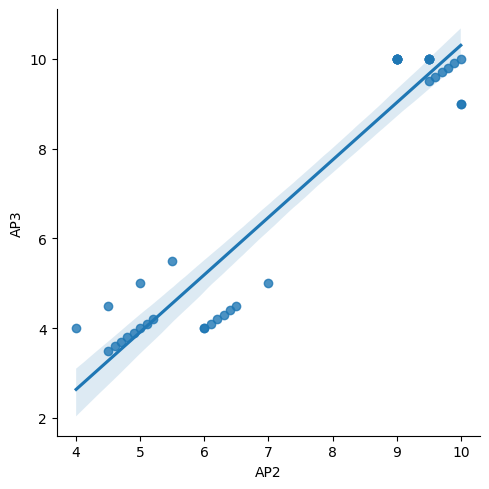

In [42]:
# Comparando em um gráfico
sns.lmplot(x = 'AP2', y = 'AP3', data=treino)

In [43]:
# Verificando a correlação
treino.corr()

,AP1,AP2,AP3,Final
AP1,1.000000,0.278632,0.003717,0.630113
AP2,0.278632,1.000000,0.952691,0.920175
AP3,0.003717,0.952691,1.000000,0.776387
Final,0.630113,0.920175,0.776387,1.000000


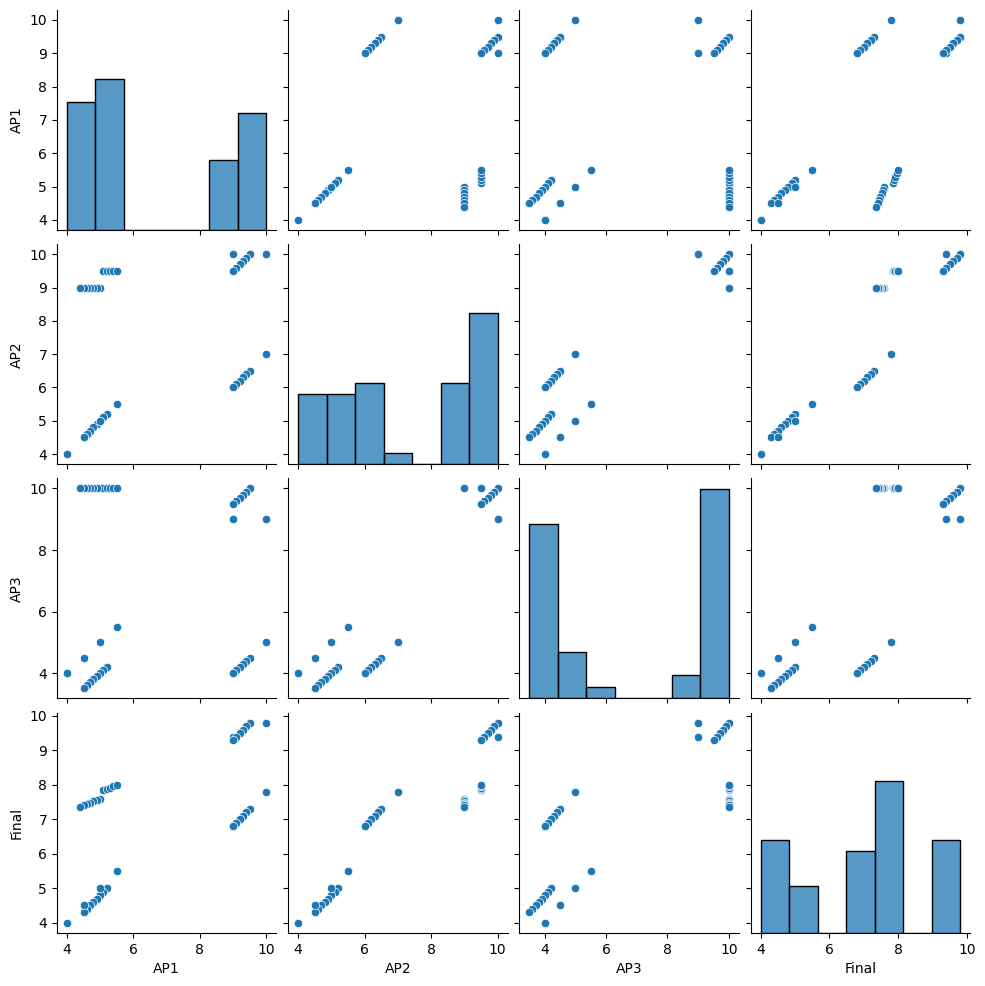

In [44]:
# visualizando as correlações
sns.pairplot(treino)

# Regressão Linear

## Exercício

Será que existe alguma relação entre a cotação do dólar e o
índice da Bovespa (IBOV)?
* Essa relação é diretamente proporcional (positiva) ou negativa?
* Qual o racional econômico que explica essa relação?
* Crie então sua máquina para prever o futuro do dólar base na
cotação do índice IBOV
* A Bolsa hoje está em quanto? E o dólar? Se o IBOV chegar em
100 mil pontos, qual o valor do dólar previsto?

Base: https://raw.githubusercontent.com/lcbjuk/ML/master/dados/usd_ibov_20%20-%2020.csv


In [47]:
# acessando a base e transformando em um df
df = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/usd_ibov_20%20-%2020.csv')
df.head()

,Date,usd,bov
0,1/2/2020,4.0249,118.57310
1,1/3/2020,4.0668,117.70666
2,1/6/2020,4.0619,116.87792
3,1/7/2020,4.0677,116.66194
4,1/8/2020,4.0644,116.24703


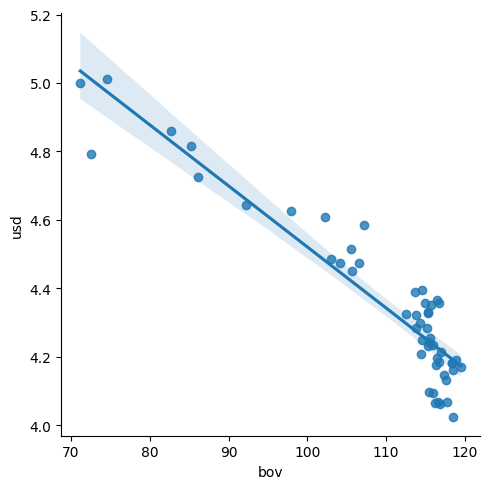

In [99]:
# Analisando a dispersão
sns.lmplot(x = 'bov', y = 'usd', data=df)

In [52]:
# Analisando a correlação
df.corr()

<ipython-input-52-654d4e1ecaea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,usd,bov
usd,1.000000,-0.928005
bov,-0.928005,1.000000


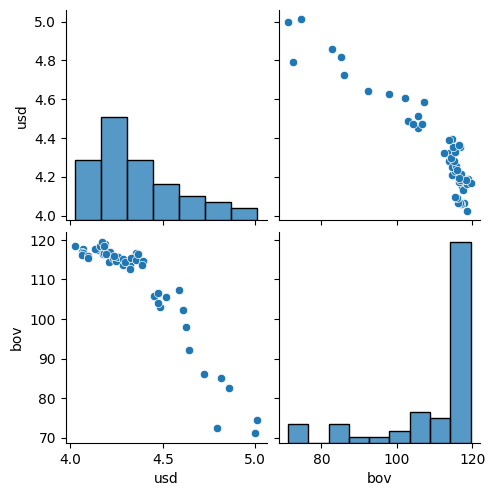

In [53]:
# Análisando o pairplot de correlação
sns.pairplot(df)

In [102]:
# Pegando os coeficientes
regli = LinearRegression()
regli.fit(df[['bov']], df['usd'])
print(regli.coef_, regli.intercept_)

[-0.01783154] 6.303900300544503


In [103]:
# Verificando o r2
r2 = regli.score(df[['bov']], df['usd'])
print('R2 = ', r2)

R2 =  0.8611940551207034


In [106]:
df2 = pd.DataFrame(
    {
        'bov':[100,116,120,90]
    }
)
df2

,bov
0,100
1,116
2,120
3,90


In [107]:
regli.predict(df2)

array([4.52074588, 4.23544117, 4.16411499, 4.69906132])

* Final da Análise 1

### Nova análise

In [87]:
# Acessando a base de dados
url = 'https://raw.githubusercontent.com/lcbjuk/ML/master/dados/usd_ibov_20%20-%2020.csv'
df = pd.read_csv(url)

In [88]:
# Mostrando a base de dados
df.head()

,Date,usd,bov
0,1/2/2020,4.0249,118.57310
1,1/3/2020,4.0668,117.70666
2,1/6/2020,4.0619,116.87792
3,1/7/2020,4.0677,116.66194
4,1/8/2020,4.0644,116.24703


In [98]:
# Verificando a correlação entre os campos usd e bov
correlacao_usd = df['usd'].corr(df['bov'])

print('Correlação:', correlacao_usd)

Correlação: -0.9280054176138754


A correlação é negativa, ou seja, a relação é inversamente proporcional.
Quando um aumenta o outro diminui.

In [97]:
declive, intersecao, valor_r, valor_p, erro_padrao = linregress(df['usd'], df['bov'])
print('Declive:', declive)
print('Intersecao:', intersecao)
print('R-quadrado:', valor_r**2)
print('P-valor:', valor_p)
print('Erro Padrão:', erro_padrao)

Declive: -48.296100602193924
Intersecao: 319.65247198818963
R-quadrado: 0.8611940551207038
P-valor: 4.3812555597496046e-23
Erro Padrão: 2.7420829420829835


#### Detalhes
Nosso coeficiente angular é -48.296100602193924

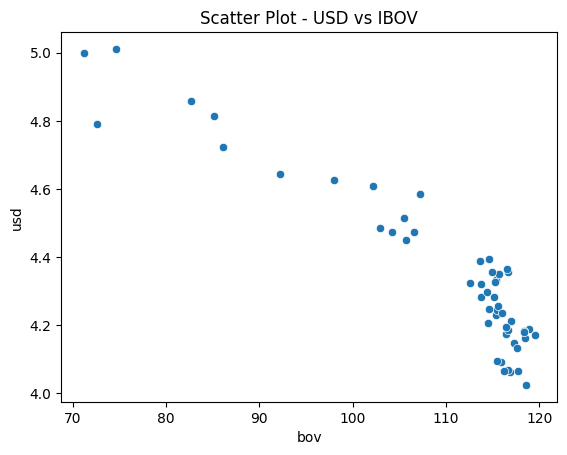

In [105]:
sns.scatterplot(data=df, x='bov', y='usd')
plt.xlabel('bov')
plt.ylabel('usd')
plt.title('Scatter Plot - USD vs IBOV')
plt.show()

# Exercício Final

## Regressão Linear: Exercício

* Monte um algoritmo preditivo de projeção OU de classificação,
utilizando respetivamente Regressão Linear ou Regressão Logística.

* Para tal, selecione uma base de dados adequada no
https://www.kaggle.com/datasets.

* Antes de realizar o treino do seu algoritmo realize uma análise exploratória, principalmente correlacionando as features e o label.
Identificados estes, siga o processo de treinar, validar, testar e revalidar. Não esqueça de apresentar sua conclusões de negócio (utilize o botão +texto)